<a href="https://colab.research.google.com/github/sramanah/sramanah/blob/main/DodoTech_Shaleena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sys
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz
import pandas as pd
import numpy as np


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


### **Part 2**

Number of instances: 128

Number of attributes: 8

Name of attributes: HomeID, Price, SqFt, Bedrooms, Bathrooms, Offers, Brick, Neighborhood

Data types of attributes:

**HomeID **          integer
**Price **           integer
**SqFt **            integer
**Bedrooms **        integer
**Bathrooms **       integer
**Offers   **        integer
**Brick **          object
**Neighborhood **   object

In [6]:
from google.colab import files
uploaded = files.upload()

Saving house-prices.csv to house-prices (1).csv


In [7]:
df=pd.read_csv("house-prices.csv")


#Look at loaded data and data types
print(df.dtypes)

HomeID           int64
Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object


In [8]:
# Let's display first 10 records 
df.head(10)


,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
5,6,114600,1780,3,2,2,No,North
6,7,151600,1830,3,3,3,Yes,West
7,8,150700,2160,4,2,2,No,West
8,9,119200,2110,4,2,3,No,East
9,10,104000,1730,3,3,3,No,East


In [9]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomeID        128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [10]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

,HomeID,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [11]:
# Finding unique values for each column in order to identify categorical and numeric variables

# Usually if the number of unique values are less than 20, the variable is likely to be categorical, otherwise it is continuous
df.nunique()

HomeID          128
Price           123
SqFt             61
Bedrooms          4
Bathrooms         3
Offers            6
Brick             2
Neighborhood      3
dtype: int64

In [12]:
#find the shape

df.shape

(128, 8)

### **Part 3**

**Euclidean distances**

A function that returns the squared difference between two numeric scalars:
d	=	(v0	− v1)2

In [13]:
def distance(v0, v1):
    return (v0-v1)**2



A function that returns the distance between two nominal scalars:
f (v0	==	v1)	
  d	=	0
else
  d	=	1

In [14]:
def vec(v0,v1):

    if v0 == v1:
       return 0
    else:
       return 1


A function that computes the Euclidean distance between two instances, X0	and X1, by taking the square root of the sum of the distances between each attribute value:

In [15]:
from math import sqrt


def euclidean_distance(v0, v1):
     return sqrt((v0[0]-v1[0])**2+(v0[1]-v1[1])**2)



Now use your distance functions to compute the pairwise distance between all instances in the data set.

• The distance between an instance and itself is always 0, i.e., d(X0,X0)	=	0.
• The distance between two instances is symmetrical, i.e., d(X0,X1)	=	d(X1,X0)
• Ignore the HomeID field because it is not an attribute that will be useful for comparing distances between instances.

In [16]:
#dropping HomeID

df1 = df.drop(['HomeID'], axis=1)
df1.head(10)



,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East
5,114600,1780,3,2,2,No,North
6,151600,1830,3,3,3,Yes,West
7,150700,2160,4,2,2,No,West
8,119200,2110,4,2,3,No,East
9,104000,1730,3,3,3,No,East


Categorical to One-Hot (numeric) Encoding. let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features.

In [17]:

#Let's create a list for our categorical columns 

cat_cols=["Brick", "Neighborhood"]

# Create a copy of the data frame in memory with a different name
df_onehot=df1.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df1, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,114300,1790,2,2,2,1,0,1,0,0
1,114200,2030,4,2,3,1,0,1,0,0
2,114800,1740,3,2,1,1,0,1,0,0
3,94700,1980,3,2,3,1,0,1,0,0
4,119800,2130,3,3,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,0,1,1,0,0
124,147900,2160,4,3,3,0,1,1,0,0
125,113500,2070,2,2,2,1,0,0,1,0
126,149900,2020,3,3,1,1,0,0,0,1


In [18]:
from scipy.spatial.distance import pdist

e = pdist(df_onehot.values, 'euclid')

In [19]:
print (e)

[  260.00961521   502.49577113 19600.92094775 ... 36400.03440932
 11101.45963376 25301.04565033]


In [20]:
#scipy has a helper function that will take this list of numbers and turn it back into a square matrix:
from scipy.spatial.distance import squareform
df_euclid = squareform(pdist(df_onehot.values, 'euclid'))

df_euclid

array([[    0.        ,   260.00961521,   502.49577113, ...,
          847.58598384, 35600.74304   , 10310.26711584],
       [  260.00961521,     0.        ,   666.41203471, ...,
          701.14691756, 35700.00151261, 10402.32690315],
       [  502.49577113,   666.41203471,     0.        , ...,
         1341.23226922, 35101.11683408,  9813.26204684],
       ...,
       [  847.58598384,   701.14691756,  1341.23226922, ...,
            0.        , 36400.03440932, 11101.45963376],
       [35600.74304   , 35700.00151261, 35101.11683408, ...,
        36400.03440932,     0.        , 25301.04565033],
       [10310.26711584, 10402.32690315,  9813.26204684, ...,
        11101.45963376, 25301.04565033,     0.        ]])

In [ ]:
#	Plot a heatmap illustrating the distance matrix between all instances in the data set.

Text(0.5, 1.0, 'Euclidean Distances')

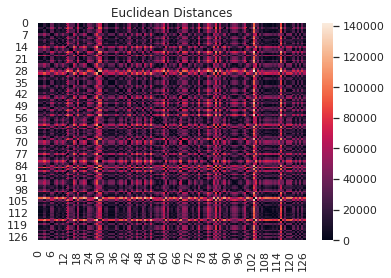

In [21]:
import seaborn as sns; sns.set_theme()
import numpy as np; np.random.seed(0)
uniform_data = np.random.rand(10, 12)


# Heatmap of distance (Euclid Distances)
ax = sns.heatmap(df_euclid)
ax.set_title('Euclidean Distances')


**Manhattan distances**

A function that returns the absolute value of the difference between two numeric scalars:
d	=	|v0	− v1|

In [22]:
def dist (v0, v1):
    return abs(v0-v1)

   

A function that computes the Manhattan distance between two instances, X0	and X1, by taking the sum of the distances between each attribute value:

In [23]:
import numpy as np

def manhattan_distance(v0, v1):
    return np.abs(v0 - v1).sum()



In [24]:
from scipy.spatial.distance import pdist

m = pdist(df_onehot.values, 'cityblock')

In [25]:
#scipy has a helper function that will take this list of numbers and turn it back into a square matrix:
from scipy.spatial.distance import squareform
df_manhattan = squareform(pdist(df_onehot.values, 'cityblock'))

df_manhattan

array([[    0.,   343.,   552., ...,  1082., 35835., 10766.],
       [  343.,     0.,   893., ...,   745., 35716., 10625.],
       [  552.,   893.,     0., ...,  1634., 35383., 10316.],
       ...,
       [ 1082.,   745.,  1634., ...,     0., 36455., 11284.],
       [35835., 35716., 35383., ..., 36455.,     0., 25535.],
       [10766., 10625., 10316., ..., 11284., 25535.,     0.]])

Text(0.5, 1.0, 'Manhattan Distances')

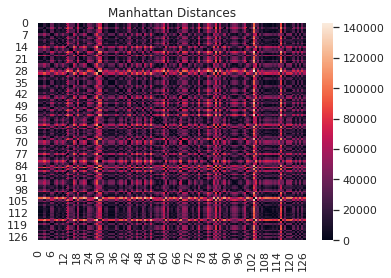

In [26]:
#	Plot a heatmap illustrating the distance matrix between all instances in the data set.
import seaborn as sns; sns.set_theme()
import numpy as np; np.random.seed(0)
uniform_data = np.random.rand(10, 12)


# Heatmap of distance (Euclid Distances)
ax = sns.heatmap(df_manhattan)
ax.set_title('Manhattan Distances')


In [27]:
#checking answers

#Euclidean Distance

df_euclid.mean()
#30055.34918821064

df_euclid.min()
#0.0

df_euclid.max()
#142102.4827685991

142102.4827685991

In [28]:
#checking answers

#Manhattan Distance

df_manhattan.mean()
#30292.447265625

df_manhattan.min()
#0.0

df_manhattan.max()
#142947.0

142947.0

### **Part 4**: Build an instance-based model

In [49]:
#making a copy of the cleaned data
df_onehot.head(10)

df_instance=df_onehot.copy()

df_instance.head(10)

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,114300,1790,2,2,2,1,0,1,0,0
1,114200,2030,4,2,3,1,0,1,0,0
2,114800,1740,3,2,1,1,0,1,0,0
3,94700,1980,3,2,3,1,0,1,0,0
4,119800,2130,3,3,3,1,0,1,0,0
5,114600,1780,3,2,2,1,0,0,1,0
6,151600,1830,3,3,3,0,1,0,0,1
7,150700,2160,4,2,2,1,0,0,0,1
8,119200,2110,4,2,3,1,0,1,0,0
9,104000,1730,3,3,3,1,0,1,0,0


In [39]:
#setting the X variables as independent variables, and y variable as dependent variable
X = df_instance.drop("Price", axis=1)
X = X.values
y = df_instance["Price"]
y = y.values



In [41]:
#creating the desired attributes

desired_data_point = np.array([2050,2,1,2,1,0,1,0,0])

In [43]:
#calculate distances between the desired data point and each data points in the dataset
distances = np.linalg.norm(X - desired_data_point, axis=1)

In [44]:
#find the 5 closest neighbors
k = 5
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([ 82,  47, 122,  73,  98])

In [47]:
#combine those neighbours to find prediction for your desired data point
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings


array([164800,  90300, 144800, 125700, 145500])

In [51]:
#average price of those neighbours
prediction = nearest_neighbor_rings.mean()

prediction
#It is $13,4220

134220.0

### **Part 5**: Build a K-Nearest Neighbours Model

In [121]:
df_onehot.head(10)

df_model_euclid=df_onehot.copy()

In [122]:
df_model_euclid

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,114300,1790,2,2,2,1,0,1,0,0
1,114200,2030,4,2,3,1,0,1,0,0
2,114800,1740,3,2,1,1,0,1,0,0
3,94700,1980,3,2,3,1,0,1,0,0
4,119800,2130,3,3,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
123,119700,1900,3,3,3,0,1,1,0,0
124,147900,2160,4,3,3,0,1,1,0,0
125,113500,2070,2,2,2,1,0,0,1,0
126,149900,2020,3,3,1,1,0,0,0,1


In [123]:
numpy_array = df_model_euclid.to_numpy()

print(numpy_array)

print(type(numpy_array))

[[114300   1790      2 ...      1      0      0]
 [114200   2030      4 ...      1      0      0]
 [114800   1740      3 ...      1      0      0]
 ...
 [113500   2070      2 ...      0      1      0]
 [149900   2020      3 ...      0      0      1]
 [124600   2250      3 ...      0      1      0]]
<class 'numpy.ndarray'>


In [125]:
import sklearn.neighbors as neighbors
nn = neighbors.NearestNeighbors(n_neighbors=128,algorithm='kd_tree', metric='euclidean')
nn.fit(numpy_array)
distances, indices =nn.kneighbors(numpy_array, return_distance=True)



In [126]:
indices

array([[  0,   1,   5, ...,  85, 116, 103],
       [  1,   0,  21, ...,  85, 116, 103],
       [  2, 111,   5, ...,  85, 116, 103],
       ...,
       [125,  21,   1, ...,  85, 116, 103],
       [126, 118,  25, ..., 104,  54,  28],
       [127, 114, 112, ...,  85, 116, 103]])

In [127]:
distances

array([[    0.        ,   260.00961521,   300.17161758, ...,
        74001.42977673, 85201.46722915, 96902.18010963],
       [    0.        ,   260.00961521,   401.12840837, ...,
        74100.32662546, 85300.39632382, 97000.86651675],
       [    0.        ,   100.019998  ,   203.96813477, ...,
        73501.76941408, 84701.7857663 , 96402.54151214],
       ...,
       [    0.        ,   308.06655125,   701.14691756, ...,
        74800.21663739, 86000.28149954, 97700.70066279],
       [    0.        ,   308.07304329,   657.9566855 , ...,
        67600.08958574, 68600.99785717, 80801.09162629],
       [    0.        ,   260.01346119,  1046.952721  , ...,
        63700.00007064, 74900.01080107, 86600.20846395]])

In [ ]:
#checking answers

#Euclidean Distance

distances.mean()
#30055.34918821064

distances.min()
#0.0

distances.max()
#142102.4827685991


#same answers as part 5

In [ ]:
#	Plot a heatmap 

Text(0.5, 1.0, 'Euclidean Distances')

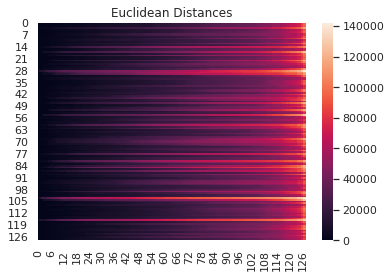

In [130]:
import seaborn as sns; sns.set_theme()
import numpy as np; np.random.seed(0)
uniform_data = np.random.rand(10, 12)


# Heatmap of distance (Euclid Distances)
ax = sns.heatmap(distances)
ax.set_title('Euclidean Distances')


**Manhattan distances**

In [146]:
df_onehot.head(10)

df_model_manhattan=df_onehot.copy()

In [147]:
numpy_array_M = df_model_manhattan.to_numpy()

print(numpy_array_M)

print(type(numpy_array_M))

[[114300   1790      2 ...      1      0      0]
 [114200   2030      4 ...      1      0      0]
 [114800   1740      3 ...      1      0      0]
 ...
 [113500   2070      2 ...      0      1      0]
 [149900   2020      3 ...      0      0      1]
 [124600   2250      3 ...      0      1      0]]
<class 'numpy.ndarray'>


In [148]:
import sklearn.neighbors as neighbors
nn = neighbors.NearestNeighbors(n_neighbors=128,algorithm='kd_tree', metric='manhattan')
nn.fit(numpy_array_M)
distances_M, indices_M =nn.kneighbors(numpy_array_M, return_distance=True)


In [142]:
distances_M

array([[    0.,   313.,   343., ..., 74467., 85710., 97558.],
       [    0.,   343.,   434., ..., 74326., 85569., 97415.],
       [    0.,   104.,   243., ..., 74017., 85258., 97108.],
       ...,
       [    0.,   373.,   745., ..., 74987., 86230., 98078.],
       [    0.,   377.,   875., ..., 67716., 68975., 81226.],
       [    0.,   345.,  1314., ..., 63707., 74950., 86796.]])

In [143]:
indices_M

array([[  0,   5,   1, ...,  85, 116, 103],
       [  1,   0,  21, ...,  85, 116, 103],
       [  2, 111,   5, ...,  85, 116, 103],
       ...,
       [125,  21,   1, ...,  85, 116, 103],
       [126, 118,  25, ..., 104,  54,  28],
       [127, 114,  73, ...,  85, 116, 103]])

In [ ]:
#checking answers

#Manhattan Distance

distances_M.mean()
#30292.447265625

distances_M.min()
#0.0

distances_M.max()
#142947.0


#not the same answers as part 5

In [ ]:
#plot heatmap

Text(0.5, 1.0, 'Manhattan Distances')

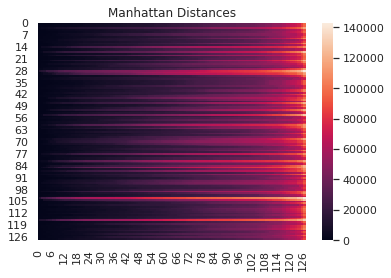

In [150]:
import seaborn as sns; sns.set_theme()
import numpy as np; np.random.seed(0)
uniform_data = np.random.rand(10, 12)


# Heatmap of distance (Euclid Distances)
ax = sns.heatmap(distances_M)
ax.set_title('Manhattan Distances')


In [ ]:
#compute 5 nearest neighbors again with desired attributes

In [151]:
df_onehot.head(10)

df_model_euc=df_onehot.copy()

In [152]:
df_euc1 = df_model_euc.drop(['Price'], axis=1)
df_euc1.head(10)

,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,1790,2,2,2,1,0,1,0,0
1,2030,4,2,3,1,0,1,0,0
2,1740,3,2,1,1,0,1,0,0
3,1980,3,2,3,1,0,1,0,0
4,2130,3,3,3,1,0,1,0,0
5,1780,3,2,2,1,0,0,1,0
6,1830,3,3,3,0,1,0,0,1
7,2160,4,2,2,1,0,0,0,1
8,2110,4,2,3,1,0,1,0,0
9,1730,3,3,3,1,0,1,0,0


In [153]:
arr_euc1 = df_euc1.to_numpy()

print(arr_euc1)

print(type(arr_euc1))

[[1790    2    2 ...    1    0    0]
 [2030    4    2 ...    1    0    0]
 [1740    3    2 ...    1    0    0]
 ...
 [2070    2    2 ...    0    1    0]
 [2020    3    3 ...    0    0    1]
 [2250    3    3 ...    0    1    0]]
<class 'numpy.ndarray'>


In [154]:
import sklearn.neighbors as neighbors
nn = neighbors.NearestNeighbors(n_neighbors=5,algorithm='kd_tree', metric='euclidean')
nn.fit(arr_euc1)
distances_e, indices_e =nn.kneighbors(arr_euc1, return_distance=True)

In [119]:
myhome = np.array([2050,2,1,2,1,0,1,0,0])

In [159]:
distances_e, indices_e = nn.kneighbors(myhome), return_distance= True)

ValueError: ignored

**Part 7**

In [160]:
!pip install chart_studio
!pip install plotly
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

     |████████████████████████████████| 64 kB 1.3 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=5e020d22aa17f6650c374fc22e13a817e62f64f66286cf00b82101c09772c356
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [175]:
#3D Plotly Visualization of Clusters using go
from sklearn.decomposition import PCA
# Make an instance of the Model
variance = 0.98 
#The higher the explained variance the more accurate the model
#will remain, but more dimensions will be present
pca = PCA(variance)

Clus_dataSet = pca.transform(distances)
print ("Dimension of our data after PCA = "+ str(Clus_dataSet.shape))

layout = go.Layout(
 title='<b>Cluster Visualisation</b>',
 yaxis=dict(
 title='<i>Y</i>'
 ),
 xaxis=dict(
 title='<i>X</i>'
 )
)
colors =['red','green' ,'blue','purple','magenta','yellow','cyan','maroon','teal','black']
trace = [ go.Scatter3d() for _ in range(11)]

for i in range(0,10):
 my_members = (k_means_labels == i)
 index = [h for h, g in enumerate(my_members) if g]
 trace[i] = go.Scatter3d(
 x=Clus_dataSet[my_members, 0],# 0 is a component among the other PCA
#components. Feel free to change it
 y=Clus_dataSet[my_members, 1],# 1 is a component among the other PCA
#components. Feel free to change it
 z=Clus_dataSet[my_members, 2],# 2 is a component among the other PCA
#components. Feel free to change it
 mode='markers',
 marker = dict(size = 2,color = colors[i]),
 hovertext=index,
 name='Cluster'+str(i),

 )
fig =go.Figure(data=[trace[0],trace[1],trace[2],trace[3],trace[4],trace[5],trace[6],trace[7],trace[8],trace[9]], layout=layout)

py.offline.iplot(fig)

NotFittedError: ignored